In [23]:
import numpy as np
from collections import OrderedDict

locusnames = ['BCL11A']
              #'HBA2', 'HBE1']

gkmexplain_parentdir = "/users/avanti.shrikumar/locusselect/gkmexplain/"
deeplift_parentdir = '/data/locusselect/deeplift_scores/'
paired_gkmexplain_deeplift_grad_paths = [
    ('BCL11A', gkmexplain_parentdir+'/coordinates_0/averaged_8.explanation.txt',
     deeplift_parentdir+"/deeplift_scores_0.npy",
     deeplift_parentdir+"/grad_scores_0.npy"),
    #('HBA2', gkmexplain_parentdir+'/coordinates_1/K562_m1_r1.explanation.txt', deeplift_parentdir+"/coordinates_1_dnase_regression.deeplift.npz"),
    #('HBE1', gkmexplain_parentdir+'/coordinates_2/K562_m1_r1.explanation.txt', deeplift_parentdir+"/coordinates_2_dnase_regression.deeplift.npz"),
]

locusname_to_coords = OrderedDict()
locusname_to_gksvmpreds = OrderedDict()
locusname_to_dlmodeloutputdiffref = OrderedDict()
locusname_to_deepliftscores = OrderedDict()
locusname_to_gradtimesinpscores = OrderedDict()
locusname_to_gkmexplainscores = OrderedDict()

for (locusname, gkmexplainpath, deepliftpath, gradtimesinppath) in paired_gkmexplain_deeplift_grad_paths:
    deeplift_scores = np.squeeze(np.load(deepliftpath))
    gradtimesinp_scores = np.squeeze(np.load(gradtimesinppath))
    locusname_to_dlmodeloutputdiffref[locusname] = np.sum(deeplift_scores, axis=(1,2))
    locusname_to_deepliftscores[locusname] = deeplift_scores[:,375:625,:]
    locusname_to_gradtimesinpscores[locusname] = gradtimesinp_scores[:,375:625,:]
    
    #get the coords, gkexplain scores and gksvm predictions
    coords = []
    gksvm_preds = []
    gkmexplain_scores = []
    for row in open(gkmexplainpath):
        coord, pred, explanation = row.rstrip().split("\t")
        coords.append(coord)
        gksvm_preds.append(float(pred))
        gkmexplain_scores.append(
            np.array([[float(z) for z in y.split(",")]
                       for y in explanation.split(";")]))
    #since the loci are all of the same length, we can cast
    # the gkmexplain scores to a single np array
    assert len(set(len(x) for x in gkmexplain_scores))==1 #make sure all of same length
    gkmexplain_scores = np.array(gkmexplain_scores)
    locusname_to_gkmexplainscores[locusname] = gkmexplain_scores
    locusname_to_gksvmpreds[locusname] = np.array(gksvm_preds)
    locusname_to_coords[locusname] = coords
    

BCL11A


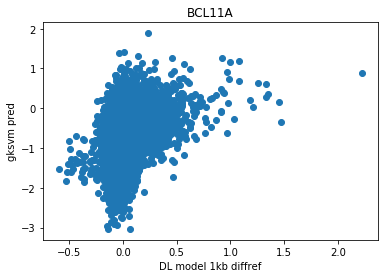

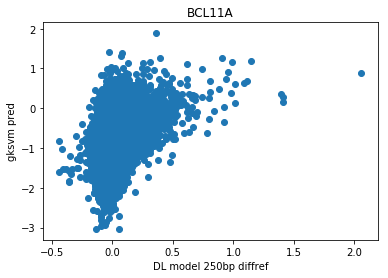

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

for locusname in locusnames:
    print(locusname)
    plt.scatter(locusname_to_dlmodeloutputdiffref[locusname], locusname_to_gksvmpreds[locusname])
    plt.xlabel("DL model 1kb diffref")
    plt.ylabel("gksvm pred")
    plt.title(locusname)
    plt.show()
    plt.scatter(np.sum(locusname_to_deepliftscores[locusname],axis=(1,2)), locusname_to_gksvmpreds[locusname])
    plt.xlabel("DL model 250bp diffref")
    plt.ylabel("gksvm pred")
    plt.title(locusname)
    plt.show()

locus BCL11A
Sorting order name Top gksvm preds
idx 6939
gksvm pred 1.89764625
sum deeplift 0.36116055
gkmexplain scores


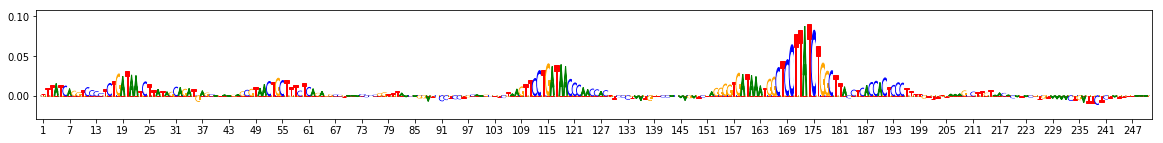

deeplift scores


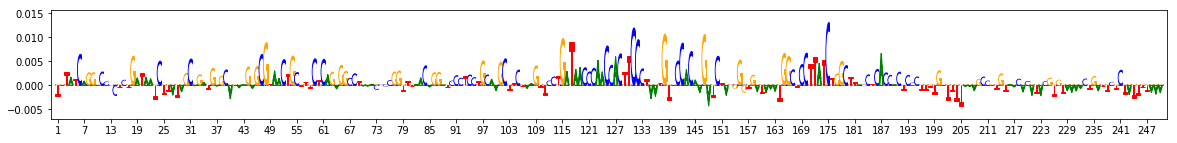

gradtimesinp scores


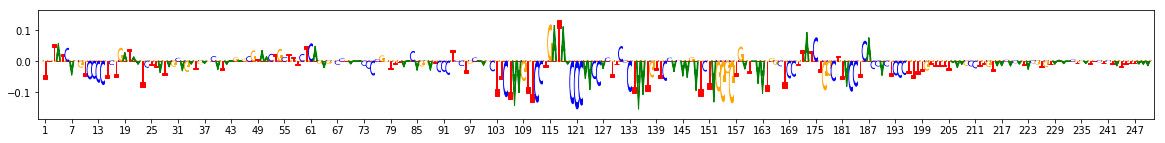

idx 2527
gksvm pred 1.4148424999999998
sum deeplift -0.030400645
gkmexplain scores


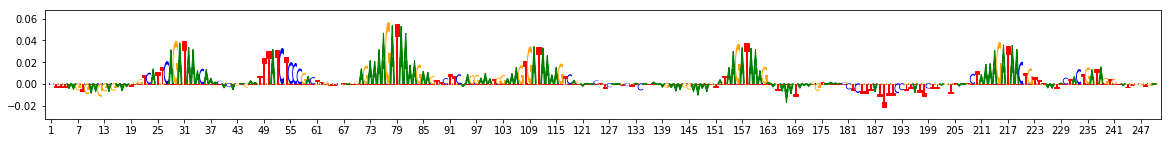

deeplift scores


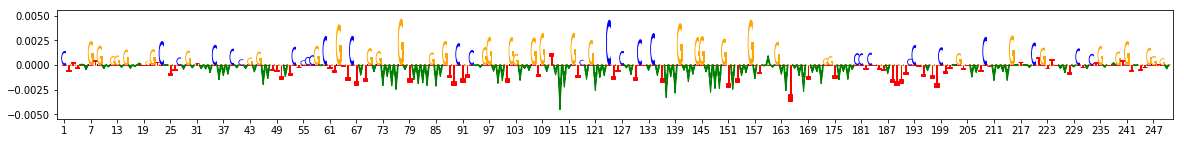

gradtimesinp scores


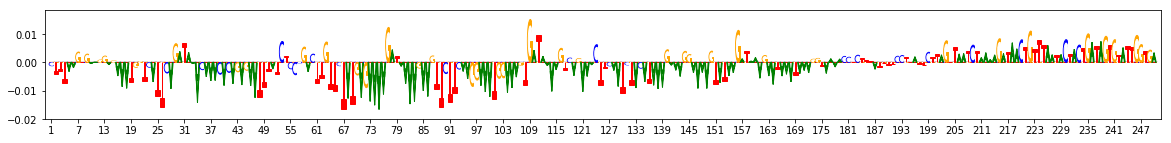

idx 546
gksvm pred 1.39401925
sum deeplift 0.07673131
gkmexplain scores


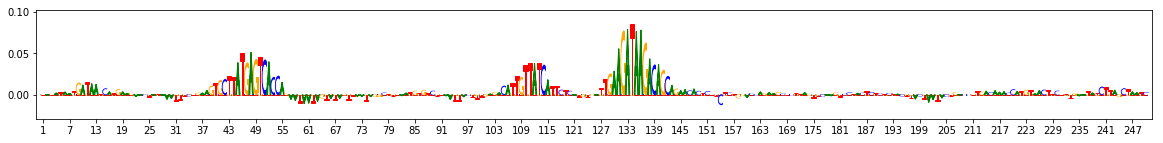

deeplift scores


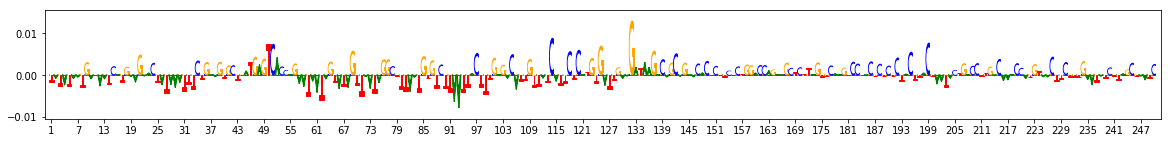

gradtimesinp scores


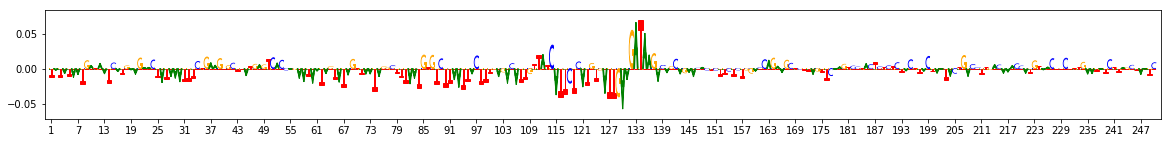

idx 7906
gksvm pred 1.314215
sum deeplift 0.07588029
gkmexplain scores


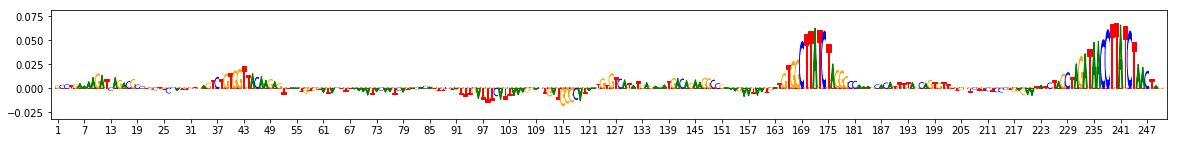

deeplift scores


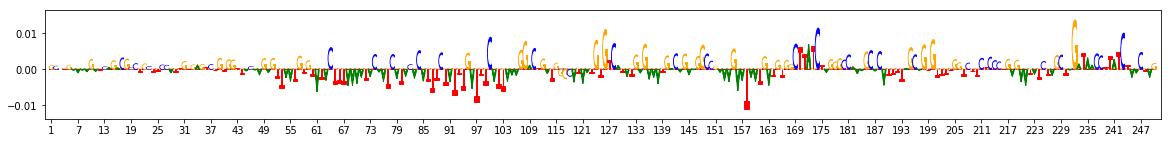

gradtimesinp scores


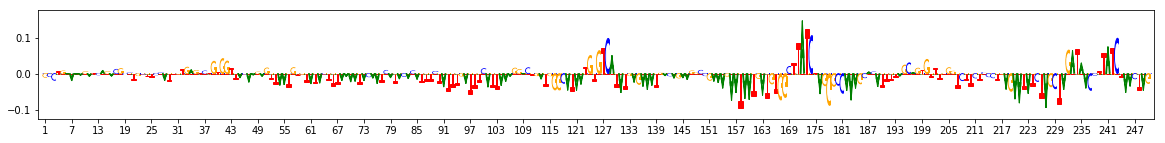

idx 1975
gksvm pred 1.2641428749999999
sum deeplift 0.39151046
gkmexplain scores


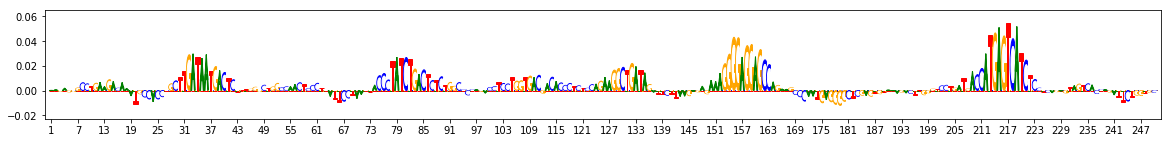

deeplift scores


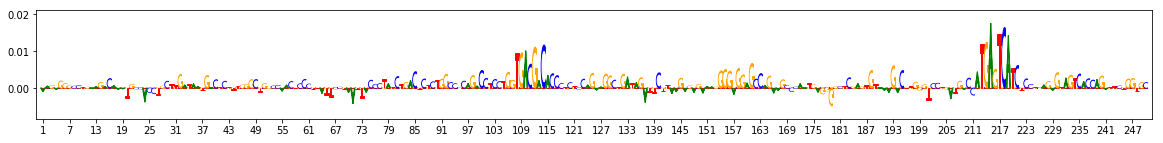

gradtimesinp scores


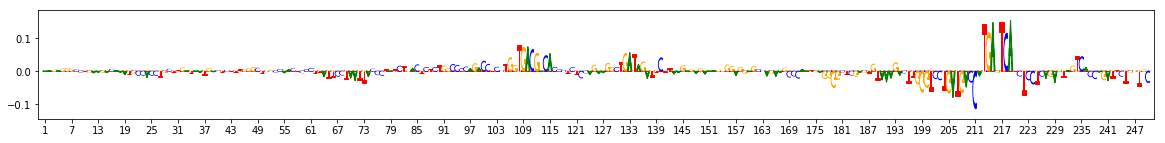

Sorting order name Sum deeplift
idx 5312
gksvm pred 0.89825125
sum deeplift 2.057393
gkmexplain scores


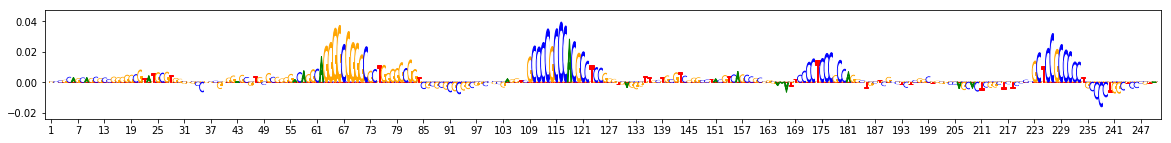

deeplift scores


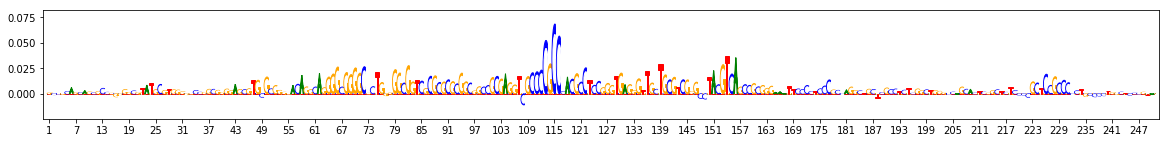

gradtimesinp scores


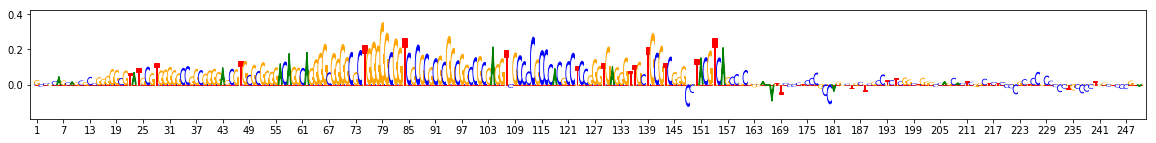

idx 3988
gksvm pred 0.281338525
sum deeplift 1.4126413
gkmexplain scores


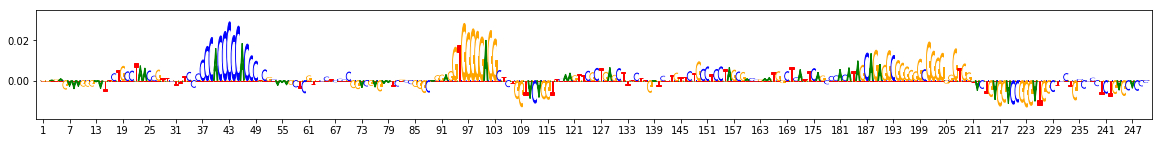

deeplift scores


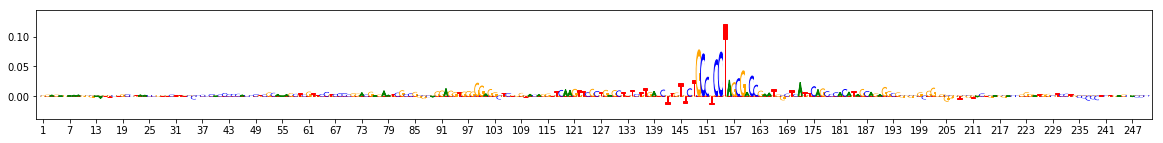

gradtimesinp scores


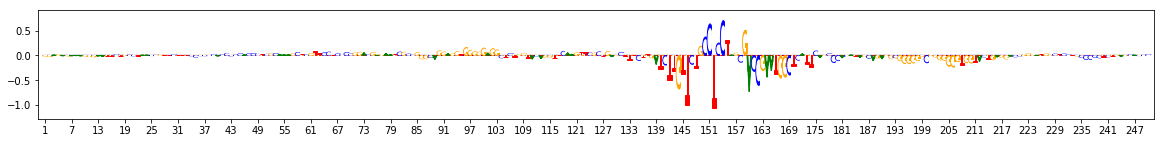

idx 6050
gksvm pred 0.1454747375
sum deeplift 1.4090629
gkmexplain scores


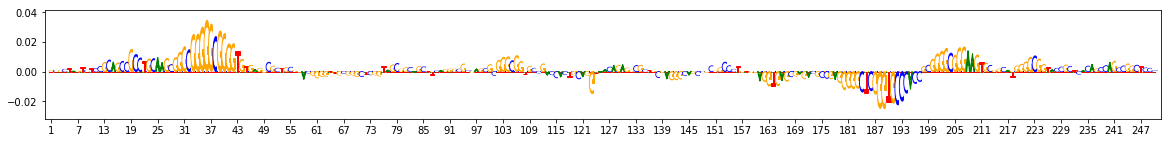

deeplift scores


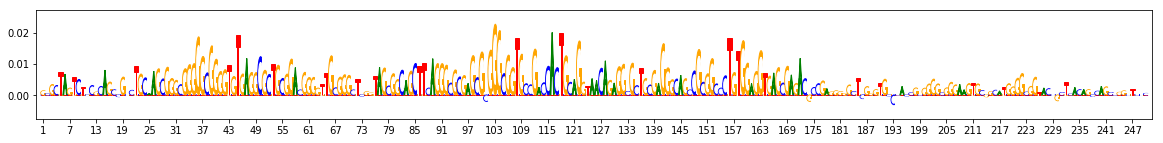

gradtimesinp scores


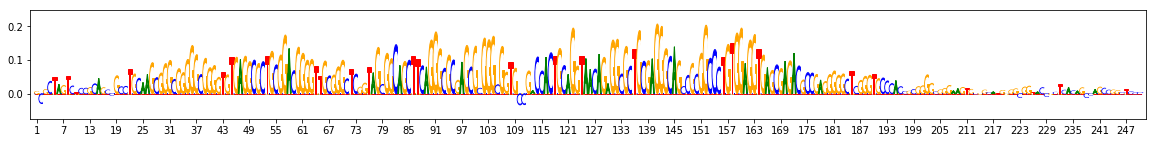

idx 4485
gksvm pred 0.3471393
sum deeplift 1.3954911
gkmexplain scores


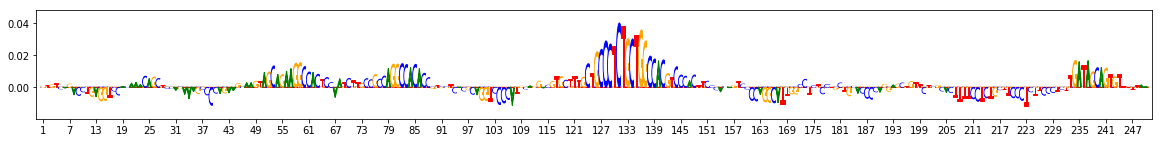

deeplift scores


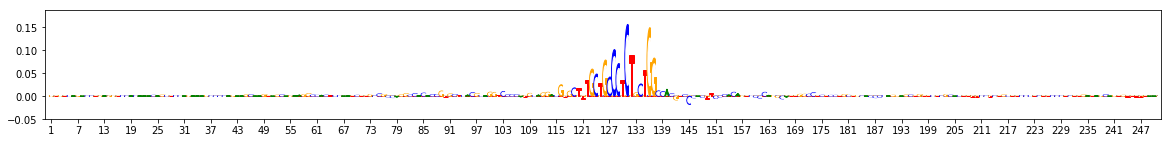

gradtimesinp scores


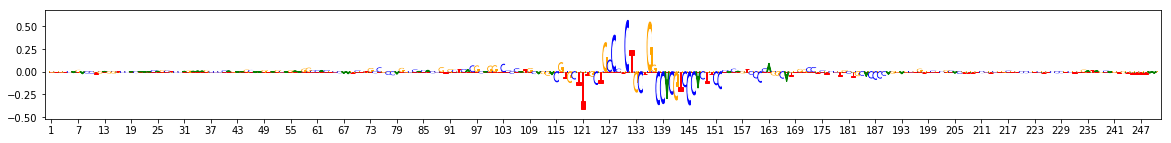

idx 7940
gksvm pred 1.195482125
sum deeplift 1.1422018
gkmexplain scores


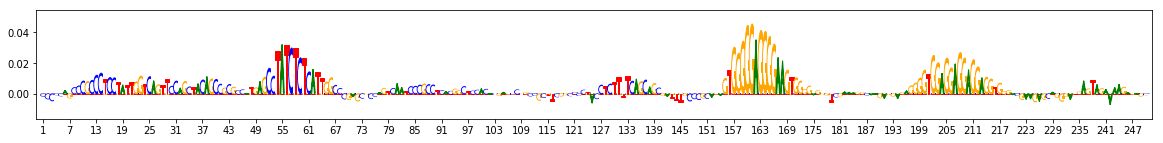

deeplift scores


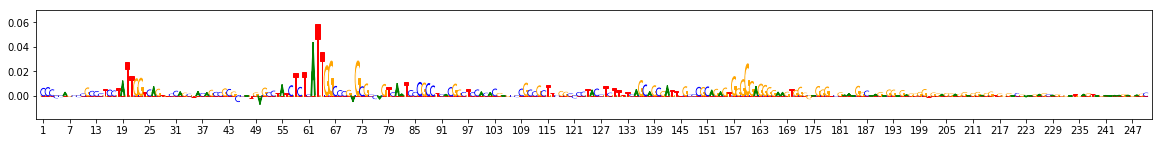

gradtimesinp scores


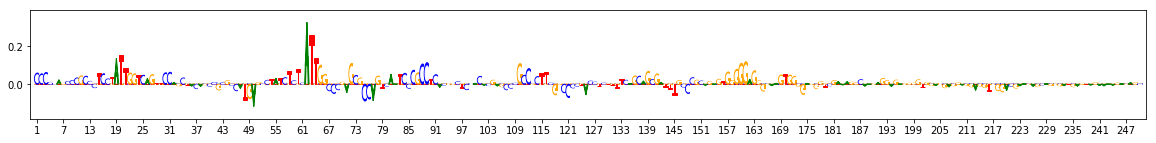

In [25]:
%matplotlib inline
from vizsequence import viz_sequence

for locusname in locusnames:
    print("locus",locusname)
    gksvmpreds = locusname_to_gksvmpreds[locusname]
    gkmexplain_scores = locusname_to_gkmexplainscores[locusname]
    deeplift_scores = locusname_to_deepliftscores[locusname]
    gradtimesinp_scores = locusname_to_gradtimesinpscores[locusname]
    deeplift_diffref = np.sum(deeplift_scores, axis=(1,2))
    
    sorted_by_gksvmpreds = [x[0] for x in sorted(enumerate(gksvmpreds), key=lambda x: -x[1])]
    sorted_by_dldiffref = [x[0] for x in sorted(enumerate(deeplift_diffref), key=lambda x: -x[1])]
    
    topN = 5
    for sortingname, sortedindices in [("Top gksvm preds", sorted_by_gksvmpreds[:topN]),
                                       ("Sum deeplift", sorted_by_dldiffref[:topN])]:
        print("Sorting order name", sortingname)
        for idx in sortedindices:
            print("idx", idx)
            print("gksvm pred", gksvmpreds[idx])
            print("sum deeplift", deeplift_diffref[idx])
            print("gkmexplain scores")
            viz_sequence.plot_weights(gkmexplain_scores[idx])
            print("deeplift scores")
            viz_sequence.plot_weights(deeplift_scores[idx])
            print("gradtimesinp scores")
            viz_sequence.plot_weights(gradtimesinp_scores[idx])
       
    

In [20]:
locusname_to_dldiffref[locusname].shape
locusname_to_gksvmpreds[locusname].shape

(8001,)

In [22]:
locusname_to_dldiffref[locusname]

array([-0.09476866,  0.49990737, -0.08557867, ..., -0.08875203,
       -2.1621852 , -0.67557895], dtype=float32)

In [23]:
locusname_to_gksvmpreds[locusname]

array(['-0.326179', '-1.54748', '-0.832324', ..., '-0.625739', '-1.67361',
       '-0.785561'], dtype='<U12')